4.6.0


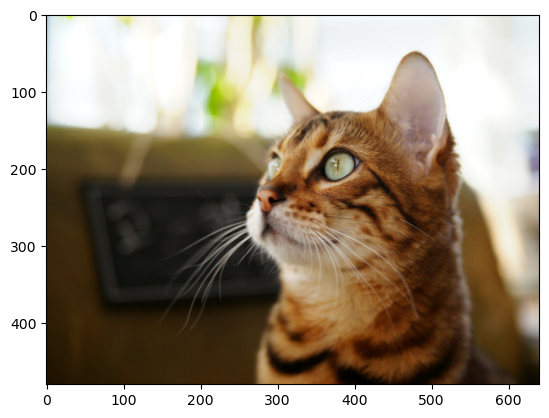

In [2]:
import cv2
import matplotlib.pyplot as plt

print(cv2.__version__)

img = cv2.imread('./cat.bmp')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [2]:
if img is None:
    print('Image load failed!')
    sys.exit()

cv2.namedWindow('image')
cv2.imshow('image', img)
cv2.waitKey()

cv2.destroyAllWindows()

In [ ]:
img = cv2.imread('cat.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

if img is None:
    print('Image load failed!')
    sys.exit()
    cv2.imwrite('cat_gray.png', img)

#cv2.namedWindow('image')
#cv2.namedWindow('image', cv2.WINDOW_NORMAL)

cv2.imshow('image', img)
cv2.waitKey()

while True:
    if cv2.waitKey() == ord('q'):
        break
cv2.destroyAllWindows()

# esc : 27
# enter : 13
# tab :  9

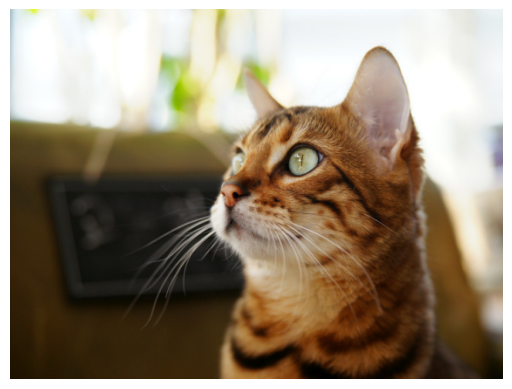

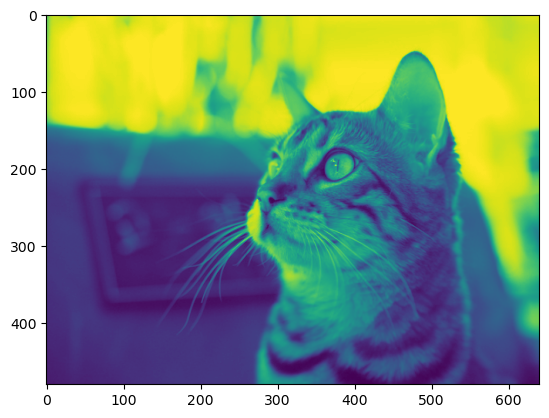

In [7]:
imgBGR = cv2.imread('./cat.bmp')
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(imgRGB)
plt.show()

imgGray = cv2.imread('./cat.bmp', cv2.IMREAD_GRAYSCALE)

plt.clf()
plt.imshow(imgGray)
plt.show()

In [9]:
!pwd

/mnt/FE0A5E240A5DDA6B/workspace/practice/DL


In [2]:
import sys, glob, cv2

img_files = glob.glob('./images/*.jpg')

if not img_files:
    print("There are no jpg files in 'images' folder")
    sys.exit()
else:
    print(img_files, len(img_files), sep = '\n')

['./images/autumn_forest_park_128379_1920x1080.jpg', './images/boat_mountains_lake_135258_1920x1080.jpg', './images/forest_fog_trees_128751_1920x1080.jpg', './images/pier_dock_sea_dusk_shore_118549_1920x1080.jpg', './images/road_marking_evening_clouds_horizon_120298_1920x1080.jpg']
5


In [5]:
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('image', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

cnt = len(img_files)
idx = 0

QObject::moveToThread: Current thread (0x23b60a0) is not the object's thread (0x3230220).
Cannot move to target thread (0x23b60a0)

QObject::moveToThread: Current thread (0x23b60a0) is not the object's thread (0x3230220).
Cannot move to target thread (0x23b60a0)

QObject::moveToThread: Current thread (0x23b60a0) is not the object's thread (0x3230220).
Cannot move to target thread (0x23b60a0)

QObject::moveToThread: Current thread (0x23b60a0) is not the object's thread (0x3230220).
Cannot move to target thread (0x23b60a0)

QObject::moveToThread: Current thread (0x23b60a0) is not the object's thread (0x3230220).
Cannot move to target thread (0x23b60a0)

QObject::moveToThread: Current thread (0x23b60a0) is not the object's thread (0x3230220).
Cannot move to target thread (0x23b60a0)

QObject::moveToThread: Current thread (0x23b60a0) is not the object's thread (0x3230220).
Cannot move to target thread (0x23b60a0)

QObject::moveToThread: Current thread (0x23b60a0) is not the object's thread

In [ ]:
idx = 0

while True:
    img = cv2.imread(img_files[idx])

    if img is None:
        print('image load failed')
        break

    cv2.imshow('image', img)
    if cv2.waitKey(2000) >= 0:
        break

    idx += 1
    if idx >= cnt:
        idx = 0

    if cv2.waitKey() == ord('q'):
        break
    
    cv2.destroyAllWindows()

In [ ]:
import sys
import numpy as np
import cv2# 두 개의 동영상을 열어서 cap1, cap2로 지정
cap1 = cv2.VideoCapture('video1.mp4')
cap2 = cv2.VideoCapture('video2.mp4')
if not cap1.isOpened() or not cap2.isOpened():
    print('video open failed!')
    sys.exit()# 두 동영상의 크기, FPS는 같다고 가정함
frame_cnt1 = round(cap1.get(cv2.CAP_PROP_FRAME_COUNT))
frame_cnt2 = round(cap2.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap1.get(cv2.CAP_PROP_FPS)
effect_frames = int(fps * 2)print('frame_cnt1:', frame_cnt1)
print('frame_cnt2:', frame_cnt2)
print('FPS:', fps)delay = int(1000 / fps)w = round(cap1.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(cap1.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'DIVX')# 출력 동영상 객체 생성
out = cv2.VideoWriter('output.avi', fourcc, fps, (w, h))# 1번 동영상 복사
for i in range(frame_cnt1 - effect_frames):
    ret1, frame1 = cap1.read()    
    if not ret1:
        print('frame read error!')
        sys.exit()    out.write(frame1)
    print('.', end='')    cv2.imshow('output', frame1)
    cv2.waitKey(delay)# 1번 동영상 뒷부분과 2번 동영상 앞부분을 합성
for i in range(effect_frames):
    ret1, frame1 = cap1.read()
    ret2, frame2 = cap2.read()    
    if not ret1 or not ret2:
        print('frame read error!')
        sys.exit()    
        dx = int(w / effect_frames) * i    
        frame = np.zeros((h, w, 3), dtype=np.uint8)
    frame[:, 0:dx, :] = frame2[:, 0:dx, :]
    frame[:, dx:w, :] = frame1[:, dx:w, :]    #alpha = i / effect_frames
    #frame = cv2.addWeighted(frame1, 1 - alpha, frame2, alpha, 0)    out.write(frame)
    print('.', end='')    cv2.imshow('output', frame)
    cv2.waitKey(delay)# 2번 동영상을 복사
for i in range(effect_frames, frame_cnt2):
    ret2, frame2 = cap2.read()    if not ret2:
        print('frame read error!')
        sys.exit()    out.write(frame2)
    print('.', end='')    cv2.imshow('output', frame2)
    cv2.waitKey(delay)print('\noutput.avi file is successfully generated!')cap1.release()
cap2.release()
out.release()
cv2.destroyAllWindows()